<a href="https://colab.research.google.com/github/g-r-a-e-m-e/essential-math-for-data-science/blob/main/chapter_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 05
## Linear Regression

### A Basic Linear Regression

m = [1.93939394]
b = [4.73333333]


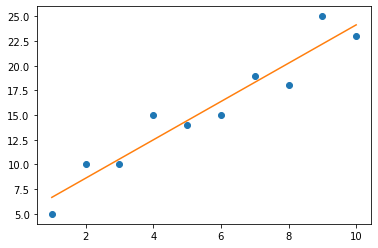

In [1]:
# Example 5-1. Using scikit-learn to do a linear regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables
X = df.values[:, : -1]

# Extract output
Y = df.values[:, -1]

# Fit a line to the points
model = LinearRegression().fit(X, Y)

# Get parameters
m = model.coef_.flatten()
b = model.intercept_.flatten()

# Print coefficient and intercept
print(f"m = {m}\nb = {b}")

# Plot
plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

#### Residuals and Squared Errors

In [2]:
# Example 5-2. Calculating the residuals for a given line and data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

# Calculate the residuals
for p in points:
  y_actual = p.y
  y_predict = m*p.x+b
  residual = y_actual - y_predict
  print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [3]:
# Example 5-4. Calculating the sum of squares for a given line and data

import pandas as pd

# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# Calculate the sum of squares
for p in points:
  y_actual = p.y
  y_predict = m*p.x+b
  residual_squared = (y_predict - y_actual)**2
  sum_of_squares += residual_squared
  
print(f"Sum of squares = {sum_of_squares}")

Sum of squares = 28.096969704500005


### Finding the Best Fit Line

#### Closed Form Equation

In [4]:
# Example 5-5

import pandas as pd

points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples())

n = len(points)

m = (n * sum(p.x * p.y for p in points) - sum(p.x for p in points) *
     sum(p.y for p in points)) / (n * sum(p.x**2 for p in points) - 
                                  sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


#### Inverse Matrix Techniques

In [5]:
from operator import inv
# Example 5-6 Using inverse and transposes matrices to fit a linear regression

import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables
X = df.values[:, : -1].flatten()

# Add dummy variable column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column
y = df.values[:, -1]

# Calculate coefficients for slope an intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ y)
print(b)

# Predict against the y-values
y_predict = X_1.dot(b)


[1.93939394 4.73333333]


In [6]:
# Example 5-7 Using QR decomposition to perform a linear regression

import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables
X = df.values[:, : -1].flatten()

# Add dummy variable column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Extract output column
y = df.values[:, -1]

# Calculate coefficients for slope and intercept using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(y)

print(b)

[1.93939394 4.73333333]


#### Gradient Descent

In [7]:
# Example 5-8 Using gradient descent to find the minimum of a parabola

import random

def f(x):
  return (x - 3) ** 2 + 4

def dx_f(x):
  return 2 * (x - 3)

# The learning rate
L = 0.001

# Number of iterations to perform gradient descent
iterations = 100000

# Start at a random x
x = random.randint(-15, 15)

for i in range(iterations):
  # Get slope
  d_x = dx_f(x)

  # Update x by subtracting the (learning rate) * (slope)
  x -= L * d_x

print(x, f(x))

3.000000000000111 4.0


##### Gradient Descent and Linear Regression

In [8]:
# Example 5-9 Performing gradient descent for a linear regression

import pandas as pd

# Import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Building the model
m = 0.0
b = 0.0

# Learning rate
L = 0.001

# Number of iterations
iterations = 100000

# Number of elements in X
n = float(len(points))

# Perform gradient descent
for i in range(iterations):
  # Slope with respect to m
  D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)

  # Slope with respect to b
  D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)

  # Update m and b
  m -= L * D_m
  b -= L * D_b

print(f"y = {m}x + {b}")

y = 1.9393939393939548x + 4.733333333333227


##### Gradient Descent for Linear Regression Using SymPy

In [9]:
# Example 5-10. Calculating partial derivatives for m and b

from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls = Function)

sum_of_squares = Sum((m * x(i) + b - y(i))**2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


In [10]:
# Example 5-11. Solving linear regression using SymPy

from sympy import *

# Import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls = Function)

sum_of_squares = Sum((m * x(i) + b - y(i))**2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
      .subs(n, len(points) - 1).doit() \
      .replace(x, lambda i: points[i].x) \
      .replace(y, lambda i: points[i].y)

d_b = diff(sum_of_squares, b) \
      .subs(n, len(points) - 1).doit() \
      .replace(x, lambda i: points[i].x) \
      .replace(y, lambda i: points[i].y)

# Compile using lambdify for faster computation
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Building the model
m = 0.0
b = 0.0

# The learning rate
L = 0.001

# Number of iterations
iterations = 100000

# Perform gradient descent
for i in range(iterations):
  # Update m and b
  m -= d_m(m, b) * L
  b -= d_b(m, b) * L

print(f"y = {m}x + {b}")

y = 1.939393939393954x + 4.733333333333231


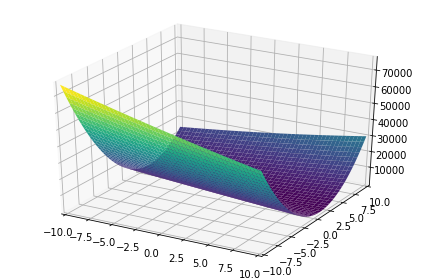

In [11]:
# Example 5-12. Plotting the loss function for linear regression

from sympy import *
from sympy.plotting import plot3d
import pandas as pd

# Import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls = Function)

sum_of_squares = Sum((m * x(i) + b - y(i))**2, (i, 0, n)) \
                 .subs(n, len(points) - 1).doit() \
                 .replace(x, lambda i: points[i].x) \
                 .replace(y, lambda i: points[i].y)

plot3d(sum_of_squares)

### Stochastic Gradient Descent

In [12]:
# Example 5-13. Performing stochastic gradient descent for a linear regression

import pandas as pd
import numpy as np

data = pd.read_csv("https://bit.ly/2KF29Bd", header = 0)

X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

n = data.shape[0]

# Building the model
m = 0.0
b = 0.0

# Sample size
sample_size = 1

# Learning rate
L = 0.0001

# Number of iterations
epochs = 100000

# Perform SGD
for i in range(epochs):
  idx = np.random.choice(n, sample_size, replace = False)

  X_sample = X[idx]
  y_sample = y[idx]

  # Current predicted value of y
  y_pred = m * X_sample + b

  # d/dm derivative of loss function
  D_m = (-2 / sample_size) * sum(X_sample * (y_sample - y_pred))

  # d/db derivative of loss function
  D_b = (-2 / sample_size) * sum(y_sample - y_pred)
  
  # Update m
  m = m - L * D_m

  # Update b
  b = b - L * D_b

  # Print progress
  if i % 10000 == 0:
    print(i, m, b)

print(f"y = {m}x + {b}")

0 0.004 0.002
10000 2.389941053158785 1.8674125426516324
20000 2.153090138991622 2.8558503480897883
30000 2.1213889829637416 3.4997328806845966
40000 2.051899317222376 3.896610322360982
50000 2.01343113946793 4.197047197703404
60000 2.0002986004494137 4.380002159122791
70000 1.9693435780475894 4.50240604412044
80000 1.9780463587343913 4.573961032658137
90000 1.9477383554046896 4.635118911466066
y = 1.9546821430140866x + 4.6649629788899585


### The Correlation Coefficient

In [13]:
# Example 5-14. Using Pandas to see the correlation coefficient between every pair of variables

import pandas as pd

# Import data from csv
df = pd.read_csv("https://bit.ly/2KF29Bd", delimiter = ',')

# Print correlations between variables
correlations = df.corr(method = 'pearson')
print(correlations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


In [14]:
# Example 5-16. Calculating the critical value from a T-distribution

from scipy.stats import t

n = 10
lower_cv = t(n - 1).ppf(.025)
upper_cv = t(n - 1).ppf(.975)

print(lower_cv, upper_cv)

-2.262157162740992 2.2621571627409915


In [15]:
# Example 5-17. Testing significance for linear-looking data

from scipy.stats import t
from math import sqrt

# Sample size
n = 10

# Critical values
lower_cv = t(n - 1).ppf(.025)
upper_cv = t(n - 1).ppf(.975)

# Correlation coefficient derived from https://bit.ly/2KF29Bd
r = 0.957586

# Perform the test
test_value = r / sqrt((1 - r**2) / (n - 2))

print(f"TEST VALUE: {test_value}")
print(f"CRITICAL RANGE: {lower_cv}, {upper_cv}")

if test_value < lower_cv or test_value > upper_cv:
  print("Correlation proven, Reject H0")
else:
    print("Correlation not proven, Failed to reject H0")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n - 1).cdf(test_value)
else:
    p_value = t(n - 1).cdf(test_value)

# Two-tailed test
p_value = 2 * p_value
print(f"P-value: {p_value}")

TEST VALUE: 9.399564671312076
CRITICAL RANGE: -2.262157162740992, 2.2621571627409915
Correlation proven, Reject H0
P-value: 5.9763860877914965e-06


### Coefficient of Determination

In [16]:
# Example 5-18. Creating a correlation matrix in Pandas

import pandas as pd

# Import data from csv
df = pd.read_csv("https://bit.ly/2KF29Bd", delimiter = ',')

# Print correlations between variables
coeff_determination = df.corr(method = 'pearson') ** 2
print(coeff_determination)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


### Standard Error of the Estimate

In [17]:
# Example 5-19. Calculating the standard error of the estimate

import pandas as pd
from math import sqrt

# Load the data
points = list(pd.read_csv("https://bit.ly/2KF29Bd", delimiter = ',').itertuples())

n = len(points)

# Regression line
m = 1.939
b = 4.733

# Calculate the standard error of estimate
S_e = sqrt((sum((p.y - (m * p.x + b))**2 for p in points)) / (n - 2))

print(S_e)

1.87406793500129


### Prediction Intervals

In [18]:
# Example 5-20. Calculating a prediction interval of vet visits for a dog that's 8.5 years old

import pandas as pd
from scipy.stats import t
from math import sqrt

# Load the data
points = list(pd.read_csv("https://bit.ly/2KF29Bd", delimiter = ',').itertuples())

n = len(points)

# Linear regression line
m = 1.939
b = 4.733

# Calculate prediction interval for x = 8.5
x_0 = 8.5
x_mean = sum(p.x for p in points) / n

# T-value
t_value = t(n - 2).ppf(.975)

# Standard error
S_e = sqrt((sum((p.y - (m * p.x + b))**2 for p in points)) / (n - 2))

# Margin of error
margin_of_error = t_value * S_e * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x**2 for p in points) - \
                        sum(p.x for p in points)**2))

predicted_y = m * x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

16.462516875955465 25.966483124044537


### Train/Test Splits

In [19]:
# Example 5-21. Doing a train/test split on linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import data from csv
df = pd.read_csv("https://bit.ly/3cIH97A", delimiter = ',')

# Extract input variables
X = df.values[:, : -1]

# Extract output column
y = df.values[:, -1]

# Separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

# Build the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Score the model and display results
result = model.score(X_test, y_test)
print(f"r^2: {round(result, 3)}")

r^2: 0.994%


In [20]:
# Example 5-22. Using three-fold cross-validation for a linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Import data from csv
df = pd.read_csv("https://bit.ly/3cIH97A", delimiter = ',')

# Extract input variables
X = df.values[:, : -1]

# Extract output column
y = df.values[:, -1]

# Perform simple linear regression
kfold = KFold(n_splits = 3, random_state = 7, shuffle = True)
model = LinearRegression()
results = cross_val_score(model, X, y, cv = kfold)
print(results)
print(f"Mean: {round(results.mean(), 3)}\nSD: {round(results.std(), 3)}")

[0.99337354 0.99345032 0.99251425]
Mean: 0.993
SD: 0.0


In [21]:
# Example 5-23. Using a random-fold validation for a linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

# Read in data
df = pd.read_csv("https://bit.ly/38XwbeB", delimiter = ',')

# Extract input variables
X = df.values[:, :-1]

# Extract output variable
y = df.values[:, -1]

# Perform a simple linear regression
kfold = ShuffleSplit(n_splits = 10, test_size = 1/3, random_state = 7)
model = LinearRegression()
results = cross_val_score(model, X, y, cv = kfold)

print(results)
print(f"Mean: {round(results.mean(), 3)}\nSD: {round(results.std(), 3)}")

[0.82514286 0.23552344 0.92653455 0.91620594 0.73260142 0.8698865
 0.55254014 0.89593526 0.91570078 0.82086621]
Mean: 0.769
SD: 0.208


### Multiple Linear Regression

In [22]:
# Example 5-24. A Linear regression with two input variables

import pandas as pd
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("https://bit.ly/2X1HWH7", delimiter = ',')

# Extract input variables
X = df.values[:, :-1]

# Extract output variable
y = df.values[:, -1]

# Training
fit = LinearRegression().fit(X, y)

# Print results
print(f"Coefficients: {fit.coef_}")
print(f"Intercept: {fit.intercept_}")
print(f"z = {fit.intercept_} + {fit.coef_[0]}x + {fit.coef_[1]}y")

Coefficients: [2.00672647 3.00203798]
Intercept: 20.109432820035963
z = 20.109432820035963 + 2.006726472512807x + 3.0020379766466925y


### Exercises